# Data Visualization in Python With Matplotlib: Advanced Concepts


# Setup

In [1]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import shap
import umap
import umap.plot
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

# Introduction

According to the [2020 Kaggle Machine Learning & Data Science survey](https://www.kaggle.com/c/kaggle-survey-2020), Matplotlib is the number one data visualization library among Kagglers, leading by a significant margin.

![](https://www.kaggleusercontent.com/kf/49771226/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pH1R3fbJtdAYOX903yXtZQ.j_PASYffqDiaUm_rgXHjJ0VnLdbJvTlzcS9fP5aPpXQuANe8F7iHjrk0vD-B026nWpn6R9kHZJMO-ysdQqUap4gBdYrFq3wOv6kvl7SSZKwzfRoNGejK5p7zK3hT21XRfT7ZrXfS-5FTxkLhuwJb8eAVki_VBu5R9P3T_YwcLSBnqJxAuMt7ccayvsy-i3KaY4j-5v2SqVdijs6Tqe5tBMh6jUf4ApTpawfPeijmMZ4ggpgB994-spR6NIYLciKxgB0y0GdFWVckL0feR0831HwU3ZD3cc-BLgbq6-x8Jmu8gwFB1u5BwbEdmfVq9kloSsowF8x0qpXGTL4k1bX_2cOBhpLiiD4DH5rBJ7IPXWK3BIm4Zqbuv40YN1mtBRQVZL7klA9pbjOJ_TPuLNhz3ysAiRygcxyBr9zXTnEWAKmCkXpmvUdcqTQQdo3VakCLHbJNDFc61VoEyZ1A9Z5_W3snV8MDtOSa92pk0Mc8bb9jT4hpG8V5iTVHvrmHPiHwl5iO5mKragUxQ8jP8qFekhXum-6WM-s3xIfMgyBGsfM97Hhjo-vtB-6lD5w56KqjJ4g45gMrItVVfWFybIElVcctnRnDO3GUo_igAmhXp5ojuA-jjhMQCw2inmhvCkZcJmKNP4yWqfvOXzdQASFo5gQcWxuJhLcd4eng8yDBTSk.q9zZgM9KxJgyeO6DzBhu2g/__results___files/__results___46_0.png)

Recently, many courses and tutorials have been drawing beginner scientists' attention to new, shiny, interactive libraries like Plotly but it does not change the truth. Matplotlib is the king of data visualization libraries and it will continue to be so for the foreseeable future. 

Therefore, it is highly recommended that you learn it, especially beyond the basics, because the power of Matplolib becomes more evident when you tap into its more advanced features. In this tutorial, we will cover some of them and give a solid introduction to the Object-oriented interface of Matplotlib.

# Matplotlib OOP basics

When you first learn Matplotlib, you probably start using the library through its PyPlot interface. It is specifically designed for beginners because it is more user-friendly, requires less code to create visuals. However, its features fall short when you want to perform advanced customizations on your graphs. That's where the Object-oriented API comes into the play.

Under the hood, Matplotlib consists of base classes called **artists**.

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

Each circle-annotated component in the above graph is a separate class that inherits from the base artists. Having unique classes for each component of a visual gives Matplotlib users a ton of flexibility. Basically, this means that you can tweak every little line, dot, text or object visible on the plot. 

In the next sections, we will learn about the most important of these classes, starting with figure and axes objects.

# Figure and axes objects

Let's first import Matplotlib and its submodules:

In [3]:
import matplotlib as mpl  # pip install matplotlib
import matplotlib.pyplot as plt

Next, we create a figure and an axes object using the `subplots` function:

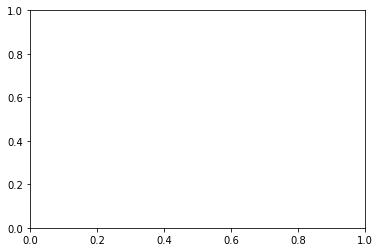

In [4]:
fig, ax = plt.subplots()

Now, let's explain what these objects do. 

`fig` (figure) is the highest-level artist, an object that contains everything. Think of it as the canvas you can draw on. An axes object (`ax`) represents a single set of XY coordinates systems. All Matplotlib plots require a coordinate system, so you need to create at least one figure and one axes object to draw charts. 

`plt.subplots` is a shorthand for doing this - it creates a single figure and one or more axes objects in a single line of code. A more verbose version of this would be like this:

In [6]:
fig = plt.figure()
ax1 = fig.add_axes()

<Figure size 432x288 with 0 Axes>

Since this version requires more code, people usually stick to `subplots`. Besides, you can pass extra arguments to create multiple axes objects simultaneously:

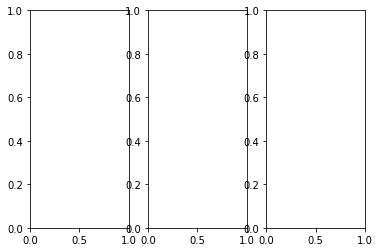

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3)

By changing the `nrows` and `ncols` arguments, you create a set of subplots - multiple axes objects which are stored in `axes`. You can access each one by using a loop or indexing operators. You can learn how to use the `subplots` function in-depth from its [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

# Plotting functions

When you switch from PyPlot to OOP API, the function names for plots does not change. You just have to call them using the axes object:

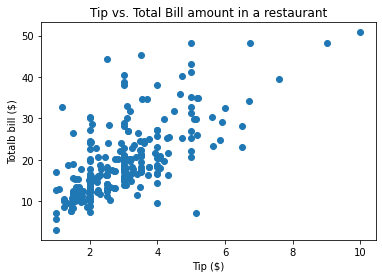

In [14]:
import seaborn as sns

tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

ax.scatter(tips["tip"], tips["total_bill"])
ax.set(
    title="Tip vs. Total Bill amount in a restaurant",
    xlabel="Tip ($)",
    ylabel="Totalb bill ($)",
);

Here, I am introducing the `set` function, which can be used on any Matplotlib object to tweak its properties.

The above plot is a bit bland and in no way compares to default scatterplots created by Seaborn:

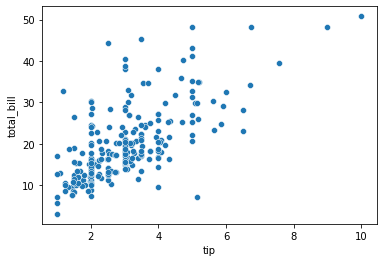

In [15]:
sns.scatterplot(tips["tip"], tips["total_bill"]);

For this reason, I will introduce two extremely flexible functions you can use to customize your plots in the next section.

# `get_*` functions

Remember how we talked about Matplotlib having separate classes for each plot component? In the next couple sections, we will greatly take advantage of this feature. 

While customizing my plots, I generally use this workflow:

1. Create the basic plot
2. Identify weakness of the plot that need customizations
3. Extract those weak objects
4. Customize them using the `setp` function

Here, we will discuss the 3rd step - how to extract different components of the plot. 

First, let's create a simple plot:

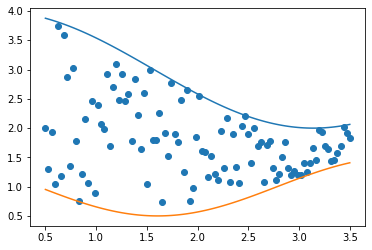

In [16]:
fig, ax = plt.subplots()

# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);

We used the `subplots` function to create the figure and axes objects but for a moment, let's assume we don't have the axes object. How do we find it?

As you remember, we said that the figure object is the highest-level artist that contains everything in the plot. So, we will call `dir` function on the `fig` object to see what methods it has:

```python
>>> dir(fig)

[
 ...
 'gca',
 'get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_axes',
 'get_dpi',
 'get_edgecolor',
 'get_facecolor',
 'get_figheight',
 'get_figure',
 'get_figwidth',
 'get_frameon',
 'get_gid',
 'get_in_layout'
 ...
]
```

In the list, we see the `get_axes` method, which is what we need:

In [17]:
axes = fig.get_axes()

type(axes)

list

In [18]:
len(axes)

1

The result we get from `get_axes` is a list containing a single axes object we created in the above plot. 

The axes example serves as a proof that everything in Matplotlib is just a class. A single plot contains several components implement as separate classes and each of those components can have one or more sub-classes. All of them have one thing in common - you can extract those classes or sub-classes using the relevant `get_*` functions. You just have to know their names.

What do you do once you extract those objects? You tweak them!

# `plt.getp` and `plt.setp` functions

To tweak the properties of any component, you have to know what arguments it has and what values each argument receives. You will be working with many objects, so visiting the documentation every time can become tiresome. 

Fortunately, Matplotlib creators even thought of this issue. Once you extract the relevant object, you can see what parameters it accepts using the `plt.getp` function. For example, let's see the properties of the axes object:

```python
fig, _ = plt.subplots()

ax = fig.get_axes()[0]

>>> plt.getp(ax)
    ...
    xlabel = 
    xlim = (0.0, 1.0)
    xmajorticklabels = [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), T...
    xminorticklabels = []
    xscale = linear
    xticklabels = [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), T...
    xticklines = <a list of 12 Line2D ticklines objects>
    xticks = [0.  0.2 0.4 0.6 0.8 1. ]
    yaxis = YAxis(54.0,36.0)
    yaxis_transform = BlendedGenericTransform(     BboxTransformTo(     ...
    ybound = (0.0, 1.0)
    ygridlines = <a list of 6 Line2D gridline objects>
    ylabel = 
    ylim = (0.0, 1.0)
    ymajorticklabels = [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), T...
    yminorticklabels = []
    yscale = linear
    ...
```

As you can see, the `getp` functions lists all properties of the object it was called on displaying their current or default values. We can do the same for the `fig` object:

```python
>>> plt.getp(fig)
    ...
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<AxesSubplot:>, <matplotlib.spines.Spine object a...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = Figure(432x288)
    figwidth = 6.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    linewidth = 0.0
    path_effects = []
    ...
```

Once you identify which parameters you want to change, you have to know what range of values they receive. For this, you can use the `plt.setp` function. For example, let's say we want to change the `yscale` parameter of the axis object. To see the possible values it accepts, we pass both the axes object and the name of the parameter to `plt.setp`:

In [21]:
plt.setp(ax, "yscale")

  yscale: {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`


As we see, `yscale` accepts 5 possible values. That's much faster than digging through the large docs of Matplotlib.

The `setp` function is very flexible. Passing just the object without any other parameters will list that object's all parameters displaying their possible values:

```python
>>> plt.setp(ax)
  ...
  xlabel: str
  xlim: (bottom: float, top: float)
  xmargin: float greater than -0.5
  xscale: {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`
  xticklabels: unknown
  xticks: unknown
  ybound: unknown
  ylabel: str
  ylim: (bottom: float, top: float)
  ymargin: float greater than -0.5
  yscale: {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`
  yticklabels: unknown
  yticks: unknown
  zorder: float
  ...
```

Now that we know what parameters we want to change and what values we want to pass to them, we can use the `set` or `plt.setp` functions:

In [24]:
plt.setp(fig)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  canvas: FigureCanvas
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  constrained_layout: bool or dict or None
  constrained_layout_pads: unknown
  contains: unknown
  dpi: float
  edgecolor: color
  facecolor: color
  figheight: float
  figure: `.Figure`
  figwidth: float
  frameon: bool
  gid: str
  in_layout: bool
  label: object
  linewidth: number
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool
  size_inches: (float, float) or float
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  tight_layout: bool or dict with keys "pad", "w_pad", "h_pad", "rect" or None
  transform: `.Transform`
  url: str
  visible: bool
  zorder: float


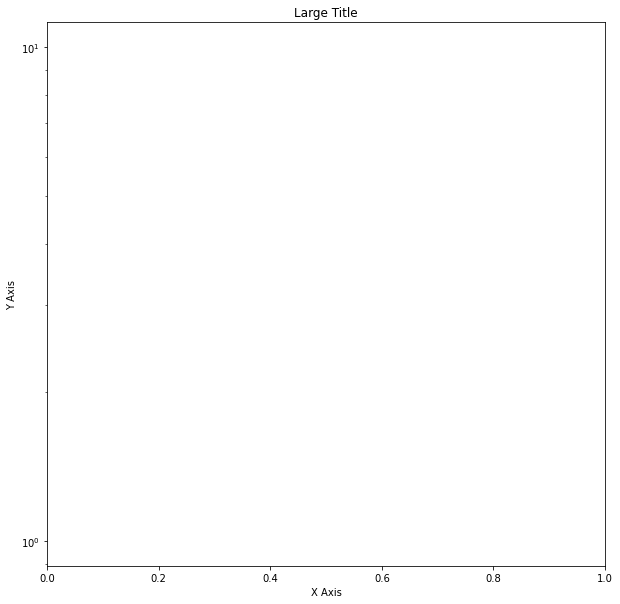

In [26]:
fig, ax = plt.subplots()

# Using `set`
ax.set(yscale="log", xlabel="X Axis", ylabel="Y Axis", title="Large Title")

# Using setp
plt.setp(ax, yscale="log", xlabel="X Axis", ylabel="Y Axis", title="Large Title")

plt.setp(fig, size_inches=(10, 10));

# Line2D object

The most common figures in any plot are lines and dots. Almost all plots such as bars, boxplots, histograms, scatterplots, etc. use rectangles, hence lines. 

For this reason, Matplotlib implements a global base class for drawing lines - the `Line2D` class. In practice, you never use it directly but it gets called every time Matplotlib draws a line - either as a plot or as part of some geometric figure. 

As many other classes inherit from this one, it is very beneficial to learn its properties:

In [29]:
from matplotlib.lines import Line2D

xs = [1, 2, 3, 4]
ys = [1, 2, 3, 4]

```python
>>> plt.setp(Line2D(xs, ys))
  ...
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  ...
```

I recommend paying attention to the `linestyle`, `width` and `color` arguments as these are used the most. 

# Customizing axis ticks

# Working with legends

# Summary